In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt

rdseed=42

In [3]:
df=pd.read_csv("Data/Train.csv")

In [4]:
X=[]
y=[]


X=df.drop(df.loc[:,(df.columns.str.contains("target"))],axis=1)
X=X.drop(["Place_ID X Date","Place_ID"],axis=1)
X.Date=pd.to_datetime(X.Date,format="%Y-%m-%d")
X["day_delta"]=(X.Date-X.Date.min()).dt.days
X=X.drop("Date",axis=1)
#X=pd.get_dummies(X,columns=["Place_ID"])


y=df["target"]
y_no_out=y.drop(y.nlargest(4).index)
x_no_out=X.drop(y.nlargest(4).index)
X_train,X_test,y_test,y_train=[],[],[],[]

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=rdseed)


In [7]:
loaded_model = pickle.load(open("xgboost_no_dum_all_features-finalmodel", 'rb'))

In [ ]:
def featur_importances_plot(model,X_test):

    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    fig = plt.figure(figsize=(10, 23))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
    plt.title('Feature Importance')
    plt.show()
    

In [17]:
def result_plot(model,X_test,y_test):

    fig , ax = plt.subplots(figsize=(10, 10))

    y_pred=model.predict(X_test)
    sns.scatterplot(x=y_test,y=y_pred)
    rmse=sqrt(mean_squared_error(y_test,y_pred))

    textstr=f"RMSE : {round(rmse,4)}"
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

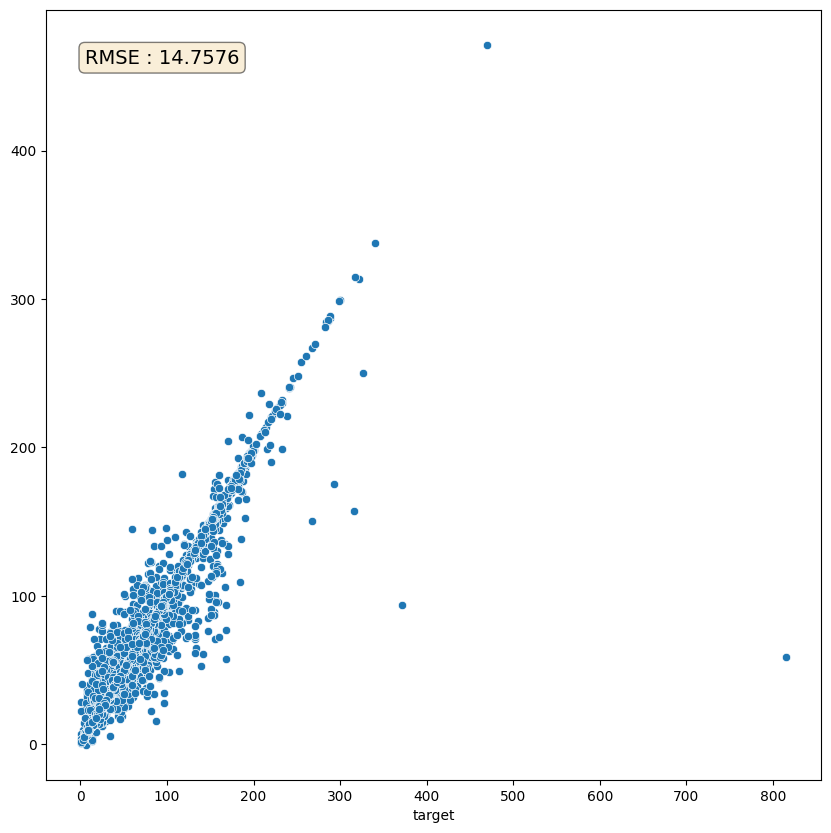

In [18]:
result_plot(loaded_model,X_test,y_test)